# Python Course Exercises - Session 5

## Plotting and Matplotlib Exercise

In the box below create a plot with the data in `IZT_TH.csv`. This is ground motion data - x- and y-acceleration against time in seconds). Note that the data is in columns corresponding to t, x & y and that you should plot each of x, y and z against t, and then plot x against y.

In [2]:
# Import data from text file - note that the first line does not contain headers
import csv
with open("IZT_TH.csv") as f:
    reader = csv.reader(f)
    titles = ['Time (sec)', 'X-Accel (g)', 'Y-Accel (g)', 'Z-Accel (g)'] 
    dataIZT = [[float(t), float(x), float(y), float(z)] for t,x,y,z in reader]

# Print first 4 lines
print("Titles:", titles)
t, x, y, z = zip(*dataIZT)
dataIZT[:4]

Titles: ['Time (sec)', 'X-Accel (g)', 'Y-Accel (g)', 'Z-Accel (g)']


[[0.0, 0.000151391, -0.000250227, 2.97644e-05],
 [0.005, 0.000150466, -0.000249245, 3.04781e-05],
 [0.01, 0.000149936, -0.000248646, 2.95488e-05],
 [0.015, 0.000148599, -0.000247562, 3.04154e-05]]

In [3]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt
%matplotlib widget

## Plotting x, y, z against t

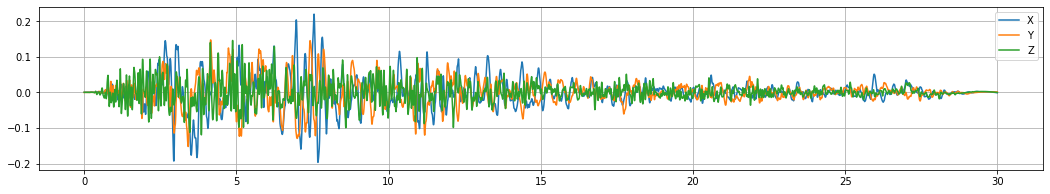

In [10]:
fig_1, ax_1 = plt.subplots(1,1, figsize=(18,3)) # this is the overall Figure and the Axes object
fig_1.set_label('Figure 1')

# Plotting the data...
ax_1.plot(t, x, '-', t, y, '-', t, z, '-')
ax_1.grid(True)
ax_1.legend(['X', 'Y', 'Z'])
# the following line will print to file
# fig_1.savefig("fig_1.svg")

## Plotting x against y

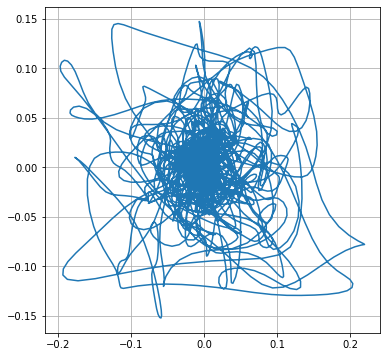

In [5]:
fig_2, ax_2 = plt.subplots(1,1, figsize=(6,6)) # this is the overall Figure and the Axes object
fig_2.set_label('Figure 2')
ax_2.grid(True)

# Plotting the data...
ax_2.plot(x, y, '-')

# the following line will print to file
# fig_2.savefig("fig_2.svg")

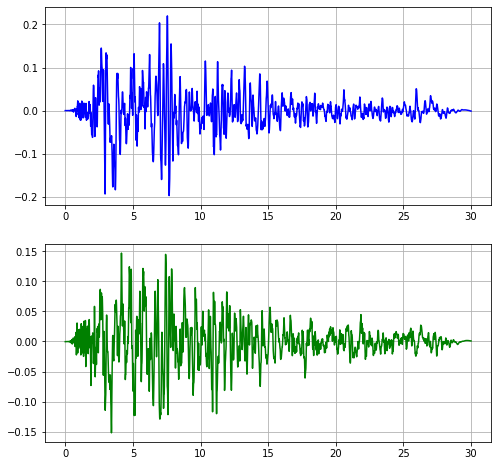

In [11]:
# Two plots (axes) in the same figure
fig_2a, [ax_2a, ax_2b] = plt.subplots(nrows=2, figsize=(8,8)) # this is the overall Figure and the Axes object
fig_2.set_label('Figure 2a & 2b')
ax_2a.grid(True)
ax_2b.grid(True)

# Plotting the data...
ax_2a.plot(t, x, 'b-')  # blue line
ax_2b.plot(t, y, 'g-')  # green line

# the following line will print to file
# fig_2a.savefig("fig_2a.svg")

## Python & Pandas - Exercise

1. Read the data from the accompanying file called `Traffic_Data.txt` (containing tab-separated data) into a pandas dataframe (note that the first line contains the vehicle categories).
2. Clean up the missing data
3. Create new columns for commercial vehicles (sum of trucks, buses and taxis) and private vehicles (sum of cars and motorcycles)
4. Print a bar chart of commercial and private vehicles against the hour.

### Reference Material
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
* https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

In [5]:
import pandas as pd

In [6]:
# Import the traffic data (the `r`  means that the string can contain back-slashes ('\'))
filepath = r'Traffic_Data.txt'
df = pd.read_csv(filepath, sep = '\t', header = 0)  # the '\t' indicates that the data is separated by tabs
df

,Hour,Taxis,Trucks,Buses,Cars,Motorcycles
0,0,NaN,1,3.0,5,4.0
1,1,5.0,3,2.0,8,5.0
2,2,8.0,4,6.0,38,3.0
3,3,9.0,3,5.0,28,NaN
4,4,6.0,5,4.0,19,1.0
5,5,8.0,4,5.0,25,4.0
6,6,7.0,5,NaN,31,5.0
7,7,8.0,3,6.0,25,6.0


In [7]:
# Replace the NaNs with zero using `fillna()` and assign to a new dataframe
df2 = df.fillna(0)
df2

,Hour,Taxis,Trucks,Buses,Cars,Motorcycles
0,0,0.0,1,3.0,5,4.0
1,1,5.0,3,2.0,8,5.0
2,2,8.0,4,6.0,38,3.0
3,3,9.0,3,5.0,28,0.0
4,4,6.0,5,4.0,19,1.0
5,5,8.0,4,5.0,25,4.0
6,6,7.0,5,0.0,31,5.0
7,7,8.0,3,6.0,25,6.0


In [8]:
# Calculate the commercial and private data and add it as additional columns
comm_cols = ['Trucks', 'Buses', 'Taxis']           # these are the columns we want to add
df2['Commercial'] = df2[comm_cols].sum(axis=1)     # axis = 1 indicates that summing should be done along rows
priv_cols = ['Cars', 'Motorcycles']
df2['Private'] = df2[priv_cols].sum(axis=1)
df2

,Hour,Taxis,Trucks,Buses,Cars,Motorcycles,Commercial,Private
0,0,0.0,1,3.0,5,4.0,4.0,9.0
1,1,5.0,3,2.0,8,5.0,10.0,13.0
2,2,8.0,4,6.0,38,3.0,18.0,41.0
3,3,9.0,3,5.0,28,0.0,17.0,28.0
4,4,6.0,5,4.0,19,1.0,15.0,20.0
5,5,8.0,4,5.0,25,4.0,17.0,29.0
6,6,7.0,5,0.0,31,5.0,12.0,36.0
7,7,8.0,3,6.0,25,6.0,17.0,31.0


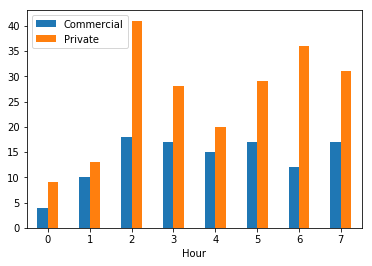

In [9]:
ax = df2.plot.bar(x = 'Hour', y = ['Commercial', 'Private'], rot=0)

Alternatively, create a new dataframe...

In [10]:
# Create a new dataframe and give it the Hour column as the index
df3 = pd.DataFrame(index = df['Hour']) # assign Hour as the index of the dataframe
# Calculate the commercial data and assign to the dataframe
comm_cols = ['Trucks', 'Buses', 'Taxis']
df3['Commercial'] = df.fillna(0)[comm_cols].sum(axis=1)
# Calculate the private data and assign to the dataframe
priv_cols = ['Cars', 'Motorcycles']
df3['Private'] = df.fillna(0)[priv_cols].sum(axis=1)
df3

,Commercial,Private
Hour,,
0,4.0,9.0
1,10.0,13.0
2,18.0,41.0
3,17.0,28.0
4,15.0,20.0
5,17.0,29.0
6,12.0,36.0
7,17.0,31.0


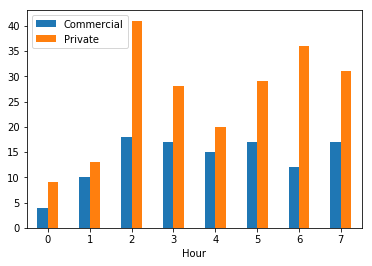

In [11]:
# Now plotting can use the defaults
ax = df3.plot.bar(rot=0)